RUN

In [2]:
import os
from collections import defaultdict

RUN

In [4]:
!pip install kagglehub
import kagglehub

# Download latest version
path = kagglehub.dataset_download("msambare/fer2013")

print("Path to dataset files:", path)

100%|██████████| 60.3M/60.3M [00:00<00:00, 201MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1


In [11]:
# List the contents of the dataset directory
print("Contents of dataset folder:", os.listdir(path))

Contents of dataset folder: ['train', 'test']


In [15]:
def count_samples(dataset_path):
    """
    Count the number of files (images) in each subfolder of 'train' and 'test'.
    Returns two dictionaries: one for train and one for test.
    """
    train_counts = defaultdict(int)
    sum_train = 0

    split_path = os.path.join(dataset_path, "train")

    if os.path.exists(split_path):  # Check if the folder exists
        for root, dirs, files in os.walk(split_path):
            folder_name = os.path.basename(root)  # Get the emotion folder name
            if root != split_path:  # Exclude 'train' or 'test' root itself
                    train_counts[folder_name] = len(files)
                    sum_train += len(files)

    else:
        print(f"Folder '{split_path}' does not exist.")

    print("total training samples:", sum_train)
    return train_counts

# Get file counts for train and test
train_counts = count_samples(path)

# Print the results
print("Training Data Counts:", train_counts)


total training samples: 28709
total testing samples: 7178
Training Data Counts: defaultdict(<class 'int'>, {'neutral': 4965, 'fear': 4097, 'surprise': 3171, 'angry': 3995, 'happy': 7215, 'disgust': 436, 'sad': 4830})
Testing Data Counts: defaultdict(<class 'int'>, {'neutral': 1233, 'fear': 1024, 'surprise': 831, 'angry': 958, 'happy': 1774, 'disgust': 111, 'sad': 1247})


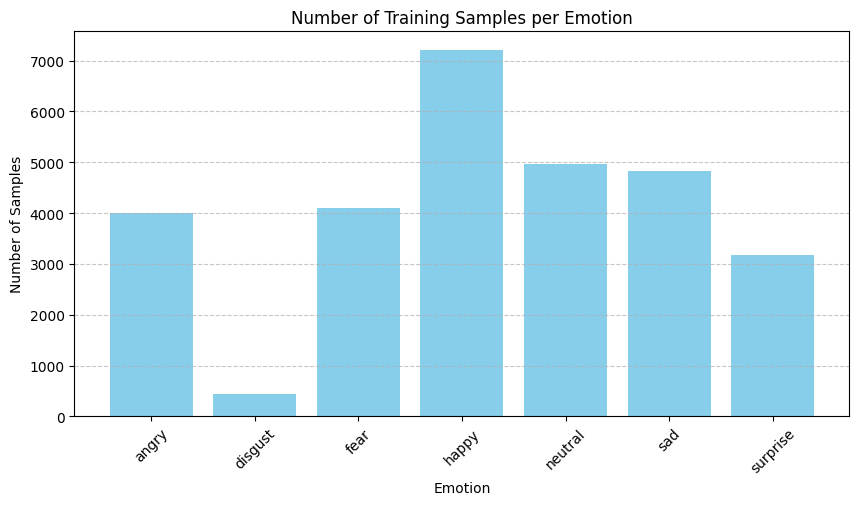

In [6]:
import matplotlib.pyplot as plt

# Sort training data counts for consistency
train_counts = dict(sorted(train_counts.items()))

# Plot the bar chart for training data only
plt.figure(figsize=(10, 5))
plt.bar(train_counts.keys(), train_counts.values(), color='skyblue')
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.title("Number of Training Samples per Emotion")
plt.xticks(rotation=45)  # Rotate labels for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

RUN

In [5]:
import shutil
from sklearn.model_selection import train_test_split

def split_train_validation(train_path, val_ratio=0.2, output_base_path="split_data"):
    """
    Splits the original 'train' dataset into 'train' and 'val' sets.
    - `val_ratio` determines how much data is moved to validation (default: 20%).
    - `output_base_path` is the new folder where the split dataset will be saved.
    """

    # Define new train and validation directories
    output_base_path = os.path.join(path, "split_data")
    new_train_path = os.path.join(output_base_path, "train")
    val_path = os.path.join(output_base_path, "val")

    # Create directories if they don't exist
    os.makedirs(new_train_path, exist_ok=True)
    os.makedirs(val_path, exist_ok=True)

    for emotion in os.listdir(train_path):  # Loop through each emotion folder
        emotion_path = os.path.join(train_path, emotion)

        if os.path.isdir(emotion_path):  # Ensure it's a folder
            # List all image files
            images = os.listdir(emotion_path)

            # Split images into train and validation sets
            train_files, val_files = train_test_split(images, test_size=val_ratio, random_state=42)

            # Create subdirectories for each emotion in new split folders
            os.makedirs(os.path.join(new_train_path, emotion), exist_ok=True)
            os.makedirs(os.path.join(val_path, emotion), exist_ok=True)

            # Move files to their respective new folders
            for file in train_files:
                shutil.copy(os.path.join(emotion_path, file), os.path.join(new_train_path, emotion, file))
            for file in val_files:
                shutil.copy(os.path.join(emotion_path, file), os.path.join(val_path, emotion, file))

    print("Splitting complete! New dataset structure:")
    print(f"- Training: {new_train_path}")
    print(f"- Validation: {val_path}")

# Define the original train dataset path
original_train_path = os.path.join(path, "train")

# Call the function to split data (80% train, 20% validation)
split_train_validation(original_train_path, val_ratio=0.2)


Splitting complete! New dataset structure:
- Training: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/split_data/train
- Validation: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/split_data/val


In [17]:
def count_samples_split(dataset_path):
    split_train_counts = defaultdict(int)
    val_counts = defaultdict(int)
    sum_val = 0
    sum_train_split = 0

    for split in ["train", "val"]:
        split_path = os.path.join(dataset_path, split)

        if os.path.exists(split_path):  # Check if the folder exists
            for root, dirs, files in os.walk(split_path):
                folder_name = os.path.basename(root)  # Get the emotion folder name
                print(folder_name)
                if root != split_path:  # Exclude 'train' or 'test' root itself
                    if split == "train":
                        train_counts[folder_name] = len(files)
                        sum_train_split += len(files)
                    else:
                        test_counts[folder_name] = len(files)
                        sum_val += len(files)
        else:
            print(f"Folder '{split_path}' does not exist.")

    print("total training samples:", sum_train_split)
    print("total validation samples:", sum_val)

    return train_counts, test_counts

# Get file counts for train and test
train_counts, test_counts = count_samples_split(os.path.join(path, "split_data"))

# Print the results
print("Training Data Counts:", train_counts)
print("Testing Data Counts:", test_counts)

train
neutral
fear
surprise
angry
happy
disgust
sad
val
neutral
fear
surprise
angry
happy
disgust
sad
total training samples: 22965
total validation samples: 5744
Training Data Counts: defaultdict(<class 'int'>, {'neutral': 3972, 'fear': 3277, 'surprise': 2536, 'angry': 3196, 'happy': 5772, 'disgust': 348, 'sad': 3864})
Testing Data Counts: defaultdict(<class 'int'>, {'neutral': 993, 'fear': 820, 'surprise': 635, 'angry': 799, 'happy': 1443, 'disgust': 88, 'sad': 966})



Training Data Counts:
angry: 3196
disgust: 348
fear: 3277
happy: 5772
neutral: 3972
sad: 3864
surprise: 2536

Validation Data Counts:
angry: 799
disgust: 88
fear: 820
happy: 1443
neutral: 993
sad: 966
surprise: 635


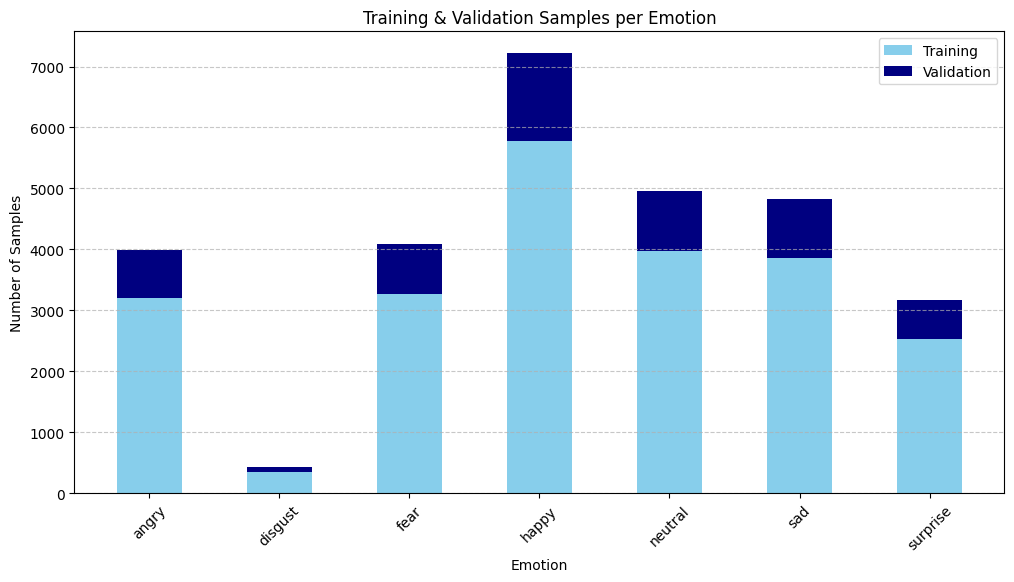

In [8]:
import numpy as np

def count_and_plot_train_val(train_path, val_path):
    """
    - Counts the number of images in each emotion folder for train and validation.
    - Prints the counts.
    - Plots a grouped bar chart (first half = train, second half = val).
    """

    # Function to count files in each folder
    def count_files_in_folders(base_path):
        folder_counts = defaultdict(int)
        for root, dirs, files in os.walk(base_path):
            folder_name = os.path.basename(root)
            if root != base_path:  # Exclude the root "train" or "val" folder itself
                folder_counts[folder_name] = len(files)
        return folder_counts

    # Get counts for train and validation
    train_counts = count_files_in_folders(train_path)
    val_counts = count_files_in_folders(val_path)

    # Ensure both dictionaries have the same keys (emotions)
    emotions = sorted(set(train_counts.keys()).union(set(val_counts.keys())))
    train_counts = {e: train_counts.get(e, 0) for e in emotions}
    val_counts = {e: val_counts.get(e, 0) for e in emotions}

    # Print counts
    print("\nTraining Data Counts:")
    for emotion, count in train_counts.items():
        print(f"{emotion}: {count}")

    print("\nValidation Data Counts:")
    for emotion, count in val_counts.items():
        print(f"{emotion}: {count}")

    # Plot the bar chart
    bar_width = 0.5  # Each bar represents both training and validation
    indices = np.arange(len(emotions))

    plt.figure(figsize=(12, 6))

    # Training bars (first half of each bar)
    plt.bar(indices, train_counts.values(), width=bar_width, label="Training", color="skyblue")

    # Validation bars (stacked on top)
    plt.bar(indices, val_counts.values(), width=bar_width, bottom=list(train_counts.values()), label="Validation", color="navy")

    # Labels and title
    plt.xlabel("Emotion")
    plt.ylabel("Number of Samples")
    plt.title("Training & Validation Samples per Emotion")
    plt.xticks(indices, emotions, rotation=45)
    plt.legend()
    plt.grid(axis="y", linestyle="--", alpha=0.7)

    # Show the plot
    plt.show()

# Define paths
train_path = "split_data/train"  # Adjust if needed
val_path = "split_data/val"      # Adjust if needed

# Run the function
count_and_plot_train_val(train_path, val_path)


RUN

In [37]:
import numpy as np
import cv2
import random
from PIL import Image, ImageEnhance

# Paths
input_folder = os.path.join(path, "split_data/train")  # Folder where the original images are stored
output_folder = os.path.join(path, "fer2013_processed_images")   # Folder to save processed images

# Create output directory if not exists
os.makedirs(output_folder, exist_ok=True)

# Function to apply Unsharp Mask for sharpness enhancement
def increase_sharpness(img, amount=1.7):
    img_pil = Image.fromarray(img)
    sharpener = ImageEnhance.Sharpness(img_pil)
    return np.array(sharpener.enhance(amount))

def increase_sharpness_cv2(img, amount=1.2, sigma=1.0):
    blurred = cv2.GaussianBlur(img, (0, 0), sigma)
    sharpened = cv2.addWeighted(img, 1 + amount, blurred, -amount, 0)
    return sharpened

# Function to apply Contrast Limited Adaptive Histogram Equalization (CLAHE)
def increase_contrast(img, clip_limit=0.2, tile_grid_size=(8,8)):
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    return clahe.apply(img)

# Function to apply horizontal flip (randomly)
def horizontal_flip(img):
    if random.random() < 0.3:  # 50% chance to flip
        return np.fliplr(img)
    return img

# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=0.5):
    if random.random() < 0.2:  # 30% chance of applying noise
        noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        img = cv2.add(img, noise)  # Apply noise
    return np.clip(img, 0, 255)  # Always return an image

# Process images in each class folder

augmentation_probability = 0.3;

for class_label in os.listdir(input_folder):
    class_path = os.path.join(input_folder, class_label)

    if os.path.isdir(class_path):  # Ensure it's a folder
        output_class_path = os.path.join(output_folder, class_label)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
            if img is None:
                continue  # Skip corrupt images

            # **Step 1: Apply Sharpness & Contrast to ALL images**
            img = increase_sharpness_cv2(img, amount=1.2)
            #img = increase_contrast(img, clip_limit=0.2)

            # Save the sharpened + contrast-enhanced image
            cv2.imwrite(os.path.join(output_class_path, img_name), img, [cv2.IMWRITE_JPEG_QUALITY, 95])

            # **Step 2: Apply Noise & Flip to a Random Subset**
            if random.random() < augmentation_probability:
                for i in range(2):  # Generate 2 new variations
                    aug_img = img.copy()  # Copy original image before applying augmentations
                    aug_img = horizontal_flip(aug_img)  # Apply flip randomly
                    aug_img = add_gaussian_noise(aug_img, mean=0, sigma=0.5)  # Apply noise

                    # Save augmented image
                    output_img_path = os.path.join(output_class_path, f"{os.path.splitext(img_name)[0]}_aug{i}.jpg")
                    cv2.imwrite(output_img_path, aug_img, [cv2.IMWRITE_JPEG_QUALITY, 95])

print(f"Processed images saved in {output_folder}")


Processed images saved in /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013_processed_images


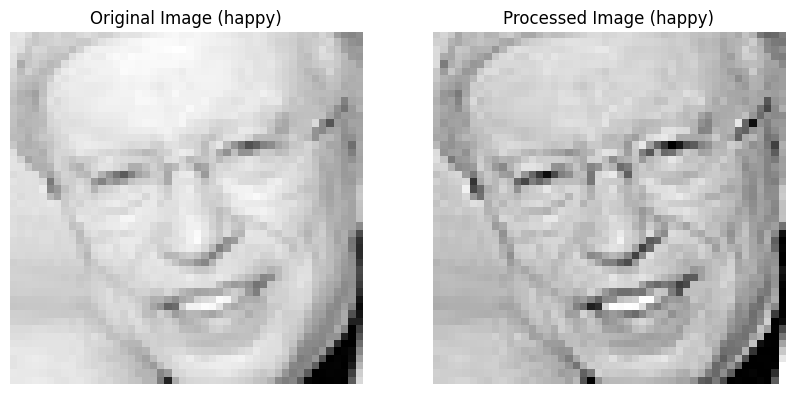

In [49]:
import matplotlib.pyplot as plt
# Define paths
original_path = os.path.join(path, "split_data/train")  # Path to original dataset
processed_path = os.path.join(path, "fer2013_processed_images")  # Path to processed dataset

# Randomly select an emotion category
emotion_categories = [d for d in os.listdir(original_path) if os.path.isdir(os.path.join(original_path, d))]
random_emotion = random.choice(emotion_categories)

# List images in the selected emotion category
original_emotion_path = os.path.join(original_path, random_emotion)
processed_emotion_path = os.path.join(processed_path, random_emotion)

original_images = os.listdir(original_emotion_path)
if not original_images:
    print("No images found in the selected emotion category!")
else:
    # Randomly pick an image
    random_image_name = random.choice(original_images)

    # Load original and processed images
    original_image_path = os.path.join(original_emotion_path, random_image_name)
    processed_image_path = os.path.join(processed_emotion_path, random_image_name)

    original_img = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)
    processed_img = cv2.imread(processed_image_path, cv2.IMREAD_GRAYSCALE)

    if original_img is None or processed_img is None:
        print("Error loading images. Make sure both original and processed images exist.")
    else:
        # Plot and compare the images side by side
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_img, cmap='gray')
        plt.title(f"Original Image ({random_emotion})")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(processed_img, cmap='gray')
        plt.title(f"Processed Image ({random_emotion})")
        plt.axis("off")

        plt.show()


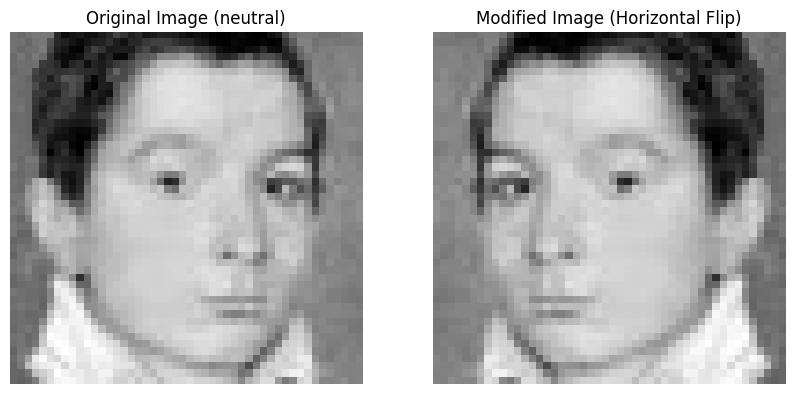

In [76]:
# Define dataset path
original_path = os.path.join(path, "split_data/train")  # Path to original dataset

# Function to apply horizontal flip
def horizontal_flip(img):
    return np.fliplr(img)

# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=0.5):
    noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
    noisy_img = cv2.add(img, noise)
    return np.clip(noisy_img, 0, 255)  # Ensure valid pixel values

# Select a random emotion category
emotion_categories = [d for d in os.listdir(original_path) if os.path.isdir(os.path.join(original_path, d))]
random_emotion = random.choice(emotion_categories)

# List all images in that category
original_emotion_path = os.path.join(original_path, random_emotion)
image_list = os.listdir(original_emotion_path)

if not image_list:
    print("No images found in the selected emotion category!")
else:
    # Pick a random image
    random_image_name = random.choice(image_list)

    # Load the original image
    original_image_path = os.path.join(original_emotion_path, random_image_name)
    original_img = cv2.imread(original_image_path, cv2.IMREAD_GRAYSCALE)

    if original_img is None:
        print("Error loading image!")
    else:
        # Apply either horizontal flip or noise randomly
        if random.random() > 0.5:
            modified_img = horizontal_flip(original_img)
            modification_type = "Horizontal Flip"
        else:
            modified_img = add_gaussian_noise(original_img)
            modification_type = "Gaussian Noise"

        # Plot and compare the images side by side
        plt.figure(figsize=(10, 5))

        plt.subplot(1, 2, 1)
        plt.imshow(original_img, cmap='gray')
        plt.title(f"Original Image ({random_emotion})")
        plt.axis("off")

        plt.subplot(1, 2, 2)
        plt.imshow(modified_img, cmap='gray')
        plt.title(f"Modified Image ({modification_type})")
        plt.axis("off")

        plt.show()


In [162]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


to copy on google drive

In [163]:
import shutil

# Define source (where the dataset is currently saved)
source_path = "/root/.cache/kagglehub/datasets/msambare/fer2013/versions/1"

# Define destination (where you want to save it in Google Drive)
destination_path = "/content/drive/MyDrive/fer2013_dataset"

# Copy dataset to Google Drive
shutil.copytree(source_path, destination_path)

print("Dataset saved permanently in Google Drive:", destination_path)


KeyboardInterrupt: 

In [9]:
def count_samples_after_processing(dataset_path):
 # Define the path to the 'train' folder
    train_path = os.path.join(dataset_path, "train")

    if os.path.exists(train_path):  # Check if the folder exists
        for root, dirs, files in os.walk(train_path):
            folder_name = os.path.basename(root)  # Get the emotion folder name

            # Ensure it's not the 'train' root itself
            if root != train_path:
                train_counts[folder_name] = len(files)

    return train_counts

# Get file counts for train and test
train_counts = count_samples_after_processing(os.path.join(path, "fer2013_processed_images"))

# Print the results
print("Training Data Counts:", train_counts)


Training Data Counts: (defaultdict(<class 'int'>, {}), defaultdict(<class 'int'>, {}))


In [13]:
import os
from collections import defaultdict

def count_samples_after_processing(dataset_path):
    counts = defaultdict(int)
    sum = 0

    # Debug: Print the dataset path being checked
    print(f"Checking dataset path: {dataset_path}")

    if os.path.exists(dataset_path):  # Check if the main directory exists
        for root, dirs, files in os.walk(dataset_path):
            folder_name = os.path.basename(root)  # Get the emotion folder name

            # Ensure we're counting only subfolders (emotion categories)
            if root != dataset_path:
                counts[folder_name] = len(files)
                sum += len(files)

    else:
        print("Error: The specified dataset folder does not exist.")

    print("total:", sum)
    return counts

# Get file counts for train in the processed images folder
dataset_folder = os.path.join(path, "fer2013_processed_images")
print(f"Dataset folder being checked: {dataset_folder}")

train_counts = count_samples_after_processing(dataset_folder)

# Print the results
print("Training Data Counts:", dict(train_counts))


Dataset folder being checked: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013_processed_images
Checking dataset path: /root/.cache/kagglehub/datasets/msambare/fer2013/versions/1/fer2013_processed_images
total: 36749
Training Data Counts: {'neutral': 6336, 'fear': 5269, 'surprise': 4060, 'angry': 5044, 'happy': 9278, 'disgust': 556, 'sad': 6206}


to download

In [ ]:
import shutil

# Compress the dataset
shutil.make_archive('/content/fer2013_dataset', 'zip', source_path)

# Download the zip file
from google.colab import files
files.download("/content/fer2013_dataset.zip")


In [ ]:
# Data Processing
import cv2
import os
import numpy as np
import concurrent.futures

# Define paths
original_train_path = os.path.join(path, "train")  # Original training data
original_test_path = os.path.join(path, "test")  # Original test data
processed_data_path = os.path.join(path, "processed_data")  # New folder for processed images
processed_train_path = os.path.join(processed_data_path, "train")  # Processed training images
processed_test_path = os.path.join(processed_data_path, "test")  # Processed test images

# Create directories
os.makedirs(processed_train_path, exist_ok=True)
os.makedirs(processed_test_path, exist_ok=True)

# Define preprocessing functions
def increase_sharpness_cv2(img, amount=1.7, sigma=1.0):
    blurred = cv2.GaussianBlur(img, (0, 0), sigma)
    sharpened = cv2.addWeighted(img, 1 + amount, blurred, -amount, 0)
    return sharpened

# Process a single image (without augmentation)
def process_image(img_path, output_class_path):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # Skip corrupt images

    # Apply sharpness enhancement
    img_processed = increase_sharpness_cv2(img, amount=1.7, sigma=1.0)

    # Save processed image
    base_name = os.path.basename(img_path)
    cv2.imwrite(os.path.join(output_class_path, base_name), img_processed, [cv2.IMWRITE_JPEG_QUALITY, 95])

# Process all images in a given folder (without augmentation)
def process_folder(original_folder, output_folder):
    for class_label in os.listdir(original_folder):
        class_path = os.path.join(original_folder, class_label)
        if not os.path.isdir(class_path):
            continue

        output_class_path = os.path.join(output_folder, class_label)
        os.makedirs(output_class_path, exist_ok=True)

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            process_image(img_path, output_class_path)

# Process train and test sets in parallel
with concurrent.futures.ThreadPoolExecutor() as executor:
    executor.submit(process_folder, original_train_path, processed_train_path)
    executor.submit(process_folder, original_test_path, processed_test_path)

print(f"Processed images saved in {processed_data_path}")

In [ ]:
# Data Partitioning
import shutil
from sklearn.model_selection import train_test_split

# Define paths for train/val split
split_data_path = os.path.join(path, "split_data")
split_train_path = os.path.join(split_data_path, "train")  # Final training set
split_val_path = os.path.join(split_data_path, "val")  # Validation set

# Create directories
os.makedirs(split_train_path, exist_ok=True)
os.makedirs(split_val_path, exist_ok=True)

# Function to split train data into train/val
def split_train_validation(train_path, val_ratio=0.2):
    for emotion in os.listdir(train_path):  # Loop through each class
        emotion_path = os.path.join(train_path, emotion)

        if os.path.isdir(emotion_path):  # Ensure it's a folder
            images = os.listdir(emotion_path)  # Get all images
            train_files, val_files = train_test_split(images, test_size=val_ratio, random_state=42)

            # Create class directories in train/val folders
            os.makedirs(os.path.join(split_train_path, emotion), exist_ok=True)
            os.makedirs(os.path.join(split_val_path, emotion), exist_ok=True)

            # Move files to their respective folders
            for file in train_files:
                shutil.copy(os.path.join(emotion_path, file), os.path.join(split_train_path, emotion, file))
            for file in val_files:
                shutil.copy(os.path.join(emotion_path, file), os.path.join(split_val_path, emotion, file))

split_train_validation(processed_train_path, val_ratio=0.2)

print(f"Splitting complete! New dataset structure:")
print(f"- Training: {split_train_path}")
print(f"- Validation: {split_val_path}")

In [ ]:
# Function to apply horizontal flip (randomly)
def horizontal_flip(img):
    if random.random() < 0.4:  # 50% chance to flip
        return np.fliplr(img)
    return img

# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=0.5):
    if random.random() < 0.4:  # 40% chance of applying noise
        noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        img = cv2.add(img, noise)  # Apply noise
    return np.clip(img, 0, 255)  # Always return an image

def random_rotation(img, angle_range=15):
    if random.random() < 0.4:
      angle = random.uniform(-angle_range, angle_range)
      h, w = img.shape[:2]
      M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
      img = cv2.warpAffine(img, M, (w, h))
    return img
    #return cv2.warpAffine(img, M, (w, h))

# Process a single image (with augmentation)
def process_image_with_aug(img_path, num_aug=3):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # Skip corrupt images

    # Save processed image
    base_name, ext = os.path.splitext(os.path.basename(img_path))
    folder_path = os.path.dirname(img_path)

    for i in range(num_aug):
        img_processed = add_gaussian_noise(img, mean=0, sigma=0.5)
        img_processed = horizontal_flip(img_processed)
        img_processed = random_rotation(img_processed)

        # Save with a modified filename (so original is not overwritten)
        new_filename = f"{base_name}_aug{i}{ext}"
        new_path = os.path.join(folder_path, new_filename)
        cv2.imwrite(new_path, img_processed, [cv2.IMWRITE_JPEG_QUALITY, 95])

#add augmentation
# Process all images in a given folder (with augmentation)
def process_folder_with_aug(original_folder, num_aug):
    for class_label in os.listdir(original_folder):
        class_path = os.path.join(original_folder, class_label)
        if not os.path.isdir(class_path):
            continue

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)
            process_image_with_aug(img_path, num_aug)

process_folder_with_aug(split_train_path, num_aug=3)

print(f"Processed images with augmentation saved in {split_train_path}")

In [ ]:
import os
import cv2
import numpy as np
import random
from scipy.ndimage import gaussian_filter

# Function to apply horizontal flip (randomly)
def horizontal_flip(img):
    if random.random() < 0.5:  # 50% chance to flip
        return np.fliplr(img)
    return img

# Function to add Gaussian noise
def add_gaussian_noise(img, mean=0, sigma=0.5):
    if random.random() < 0.5:  # 50% chance of applying noise
        noise = np.random.normal(mean, sigma, img.shape).astype(np.uint8)
        img = cv2.add(img, noise)  # Apply noise
    return np.clip(img, 0, 255)

# Function to apply random rotation
def random_rotation(img, angle_range=20):
    if random.random() < 0.5:
        angle = random.uniform(-angle_range, angle_range)
        h, w = img.shape[:2]
        M = cv2.getRotationMatrix2D((w // 2, h // 2), angle, 1)
        img = cv2.warpAffine(img, M, (w, h))
    return img

# Function to adjust brightness
def random_brightness(img, factor_range=(0.6, 1.4)):
    if random.random() < 0.5:
        factor = random.uniform(*factor_range)
        img = np.clip(img * factor, 0, 255).astype(np.uint8)
    return img

# Function to apply elastic transformation
def elastic_transform(img, alpha=20, sigma=4):
    if random.random() < 0.4:
        random_state = np.random.RandomState(None)
        shape = img.shape
        dx = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
        dy = gaussian_filter((random_state.rand(*shape) * 2 - 1), sigma) * alpha
        x, y = np.meshgrid(np.arange(shape[1]), np.arange(shape[0]))
        indices = np.reshape(y + dy, (-1, 1)), np.reshape(x + dx, (-1, 1))
        img = cv2.remap(img, indices[1].astype(np.float32), indices[0].astype(np.float32), interpolation=cv2.INTER_LINEAR)
    return img

# Function to apply random cropping safely
def random_crop(img, crop_size=40):
    if random.random() < 0.4:
        h, w = img.shape[:2]
        # Ensure crop_size does not exceed image dimensions
        crop_size = min(crop_size, h, w)

        # Set start positions so that the crop is within the image
        start_x = 0 if w == crop_size else random.randint(0, w - crop_size)
        start_y = 0 if h == crop_size else random.randint(0, h - crop_size)

        cropped = img[start_y:start_y+crop_size, start_x:start_x+crop_size]
        # Check if cropping produced a valid image, if not, skip cropping
        if cropped.size == 0:
            return img
        img = cv2.resize(cropped, (w, h))  # Resize back to original size

    return img

# Process a single image with augmentations
def process_image_with_aug(img_path, num_aug=3):
    img = cv2.imread(img_path, cv2.IMREAD_GRAYSCALE)
    if img is None:
        return  # Skip corrupt images

    base_name, ext = os.path.splitext(os.path.basename(img_path))
    folder_path = os.path.dirname(img_path)

    for i in range(num_aug):
        img_processed = img.copy()
        img_processed = horizontal_flip(img_processed)
        img_processed = add_gaussian_noise(img_processed, mean=0, sigma=0.5)
        img_processed = random_rotation(img_processed)
        img_processed = random_brightness(img_processed)
        img_processed = elastic_transform(img_processed)
        img_processed = random_crop(img_processed)

        # Save with a modified filename (so original is not overwritten)
        new_filename = f"{base_name}_aug{i}{ext}"
        new_path = os.path.join(folder_path, new_filename)
        cv2.imwrite(new_path, img_processed, [cv2.IMWRITE_JPEG_QUALITY, 95])

# Process folder with different augmentation rates per class
def process_folder_with_aug(original_folder):
    for class_label in os.listdir(original_folder):
        class_path = os.path.join(original_folder, class_label)
        if not os.path.isdir(class_path):
            continue

        if class_label == 'disgust':
            num_aug = 20  # Heavy augmentation for 'disgust'
        elif class_label == 'surprise':
            num_aug = 10  # Moderate augmentation for 'surprise'
        else:
            num_aug = 1  # Only 5% of images are augmented for other classes

        for img_name in os.listdir(class_path):
            img_path = os.path.join(class_path, img_name)

            # For other classes, only augment ~5% of images
            if class_label not in ['disgust', 'surprise'] and random.random() > 0.05:
                continue

            process_image_with_aug(img_path, num_aug)

# Call the function
process_folder_with_aug(split_train_path)

print(f"Processed images with augmentation saved in {split_train_path}")

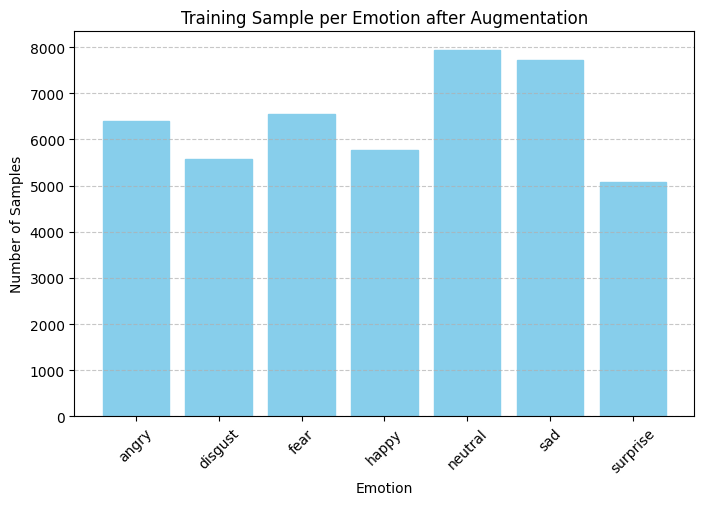

In [51]:
import matplotlib.pyplot as plt

# Data from the dataset
emotions = ["angry", "disgust", "fear", "happy", "neutral", "sad", "surprise"]
samples = [6392, 5568, 6554, 5772, 7944, 7728, 5072]

# Plot bar chart
plt.figure(figsize=(8, 5))
plt.bar(emotions, samples, color='skyblue', edgecolor='skyblue')

# Labels and title
plt.xlabel("Emotion")
plt.ylabel("Number of Samples")
plt.title("Training Sample per Emotion after Augmentation")
plt.xticks(rotation=45)  # Rotate labels for better visibility
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()
